## Making TF records from Solar Data Tutorial

In [1]:
# import necessary packages

#from __future__ import absolute_import, division, print_function
#import argparse
#import multiprocessing
import os
import sys
import numpy as np
#import pdb
from random import shuffle
import pandas as pd
import tensorflow as tf
from astropy.io import fits
from astropy.io.fits import getheader
import tensorflow as tf
from tf_util import example_util
import matplotlib.pylab as plt

In [2]:
# read in the HARPS data that has been shifted and is ready for being added to TF records

# set outfile to filename
# outfile = 'HARPS2.3.1_ready_for_TF_records.npz'
outfile = 'New_HARPS_ready_for_TF_records.npz'
org_file = 'HARPS2.3.1_ready_for_TF_records.npz'
# load the file
npzfile = np.load(outfile) 
onpzfile = np.load(org_file)

# List the column names in this file
onpzfile.files

######### Need review: ########
# vrad_star
# og_ccf_list
# jup_shifted_CCF_data_list
# zero_shifted_CCF_list ???????
# mu_og_list (possibly ok)
# mu_jup_list
# mu_zero_list
# cont
# bis

['BJD',
 'vrad_star',
 'og_ccf_list',
 'jup_shifted_CCF_data_list',
 'zero_shifted_CCF_list',
 'CCF_normalized_list',
 'cff_residual_list',
 'ccf_residual_rescaled',
 'CCF_normalized_list_cutoff',
 'CCF_residual_list_cutoff',
 'ccf_residual_rescaled_cutoff',
 'mu_og_list',
 'mu_jup_list',
 'mu_zero_list',
 'fwhm',
 'cont',
 'bis',
 'shift_by_rv']

In [3]:
y_data = npzfile['cff_residual_list'][0]
y2_data = onpzfile['cff_residual_list'][1]
y3_data = y2_data - y_data

# print(f"New data: {y_data} vs. Old data: {y2_data}")



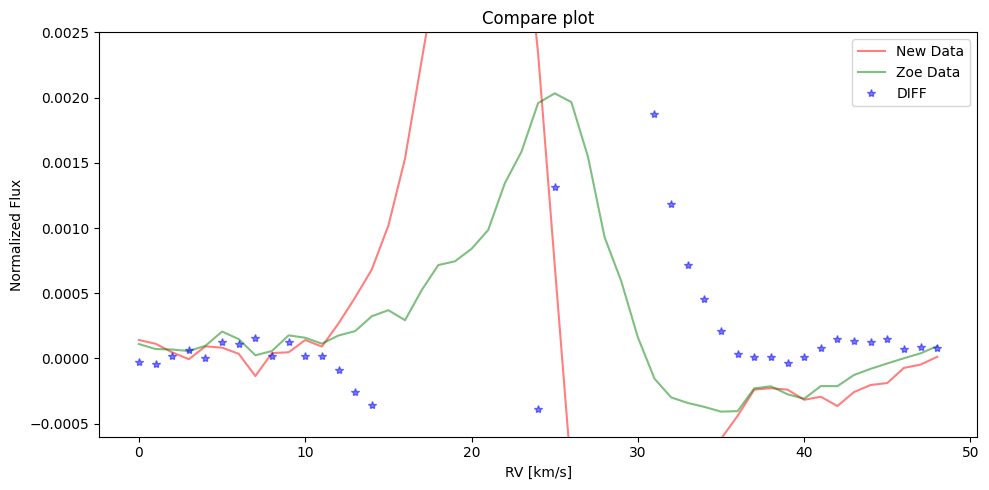

In [ ]:

plt.figure(figsize=(10, 5))
# plt.ylim([-0.0006, 0.0025])
# Plot Data
plt.plot(y_data, color='red', linewidth=1.5, label='New Data', alpha=0.5)
plt.plot(y2_data, color='green', label='Zoe Data', alpha=0.5)
plt.plot(y3_data, '*', color='blue', label='DIFF', alpha=0.5)
plt.legend()
plt.xlabel("RV [km/s]")
plt.ylabel("Normalized Flux")
plt.title("Compare plot")
plt.tight_layout()
plt.show()

In [5]:
from datetime import datetime, timedelta

def BJD2dates(date_values, a_day):
    """
    Accepts an array of float dates, sorts them, and prints 
    only the rows matching 'a_day' along with their sorted index.
    """
    # Convert input string 'a_day' to a date object for comparison
    target_date = datetime.strptime(a_day, "%Y-%m-%d").date()
    
    # Sort the array so indices are relative to the sorted list
    dates_arr = np.sort(np.array(date_values, dtype=np.float64))
    epoch = datetime(1858, 11, 17)
    
    # Updated header with 'Index' column
    print(f"{'Index':<6} | {'Original Value':<18} | {'Type':<5} | {'Readable Date (UTC/ISO)'}")
    print("-" * 75)
    
    # Use enumerate to track the index 'i' while iterating
    for i, val in enumerate(dates_arr):
        if val > 2400000:
            mjd_value = val - 2400000.5
            date_type = "JD"
        else:
            mjd_value = val
            date_type = "MJD"

        readable_date = epoch + timedelta(days=float(mjd_value))
        
        # Filter by specific day
        if readable_date.date() == target_date:
            # Print row including the index 'i'
            print(f"{i:<6} | {val:<18.10f} | {date_type:<5} | {readable_date.isoformat()}")


In [6]:
BJD2dates(npzfile['BJD'], "2015-09-17")

Index  | Original Value     | Type  | Readable Date (UTC/ISO)
---------------------------------------------------------------------------
1      | 57282.4641876048   | MJD   | 2015-09-17T11:08:25.809055


In [7]:
BJD2dates(onpzfile['BJD'], "2017-03-07")

Index  | Original Value     | Type  | Readable Date (UTC/ISO)
---------------------------------------------------------------------------
310    | 2457819.9721465460 | JD    | 2017-03-07T11:19:53.461575


## Try adding a new feature now :)